<a href="https://colab.research.google.com/github/otworiallan/otworiallan/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [441]:
import torch
import numpy as np

from torch import nn
import matplotlib.pyplot as plt


In [442]:
weight = 0.7
bias = 0.3
X = torch.arange(start=0,end=1,step=0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10:], y[:10:]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [443]:
len(X), len(y)

(50, 50)

In [444]:
# Train and Test split
train_split = int(0.8 * len(X))
X_train = X[:train_split:]
y_train = y[:train_split:]

X_test = X[train_split::]
y_test = y[train_split::]

In [445]:
len((X_test))

10

In [446]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None
):

  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s =4, label="Testing data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Legend
  plt.legend(prop={"size": 14})




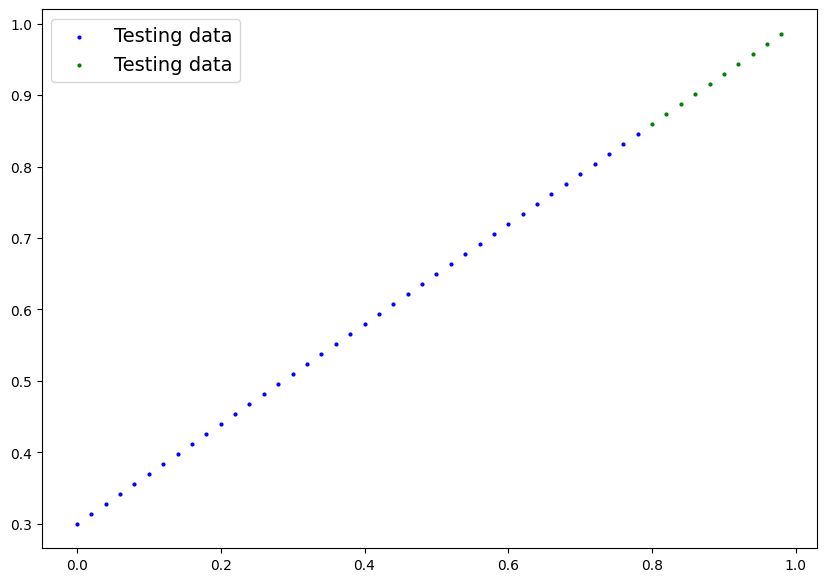

In [447]:
plot_predictions()

#PyTorch Model

In [448]:
#Linear Regression
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias





In [449]:
torch.manual_seed(42)
model = LinearRegressionModel()

In [450]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [451]:
model.weights, model.bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True))

In [452]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [453]:
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

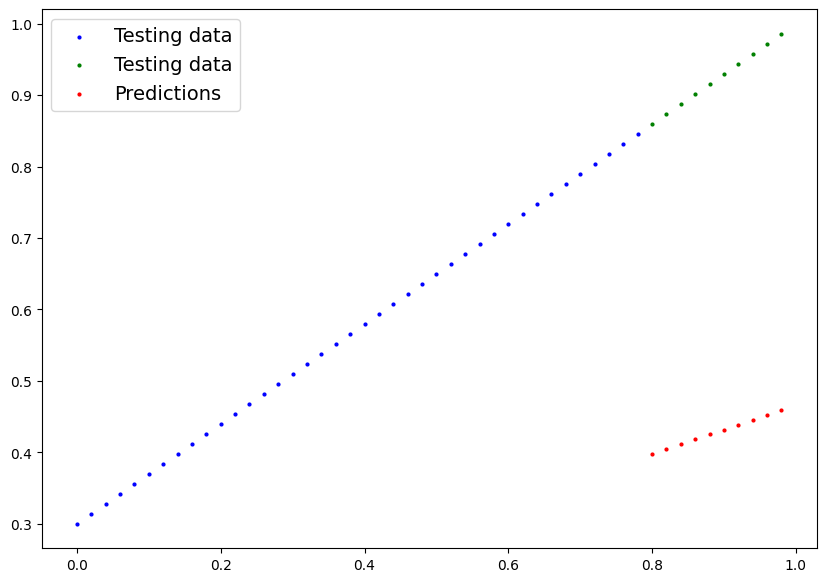

In [454]:
plot_predictions(predictions=y_preds)

In [455]:
#Loss Function
loss_fn = nn.L1Loss(reduction="mean")

In [456]:
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [457]:
with torch.no_grad():
    list(model.parameters())
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [458]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [459]:
epoch_count = []
loss_values = []
test_loss_values = []

#Training and Testing loop

In [460]:
def train_loop(epochs):

    for epoch in range(epochs):
        #set the model to training mode
        # .train() in Pytorch, sets all parameters that require gradients to require gradients
        model.train()

        # Forward pass
        y_preds = model(X_train)

        # Calculate loss
        loss = loss_fn(y_preds, y_train)

        # Optimizer zero grad
        optimizer.zero_grad()

        #Backpropagation on the loss w.r.t the parameters of the model
        loss.backward()

        # Step the Optimizer (Gradient Descent)
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Loss: {loss}")
            print(model.state_dict())

            epoch_count.append(epoch)
            loss_values.append(loss)

In [461]:
train_loop(epochs=200)

Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.1976713240146637
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.08908725529909134
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.053148526698350906
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Loss: 0.04543796554207802
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Loss: 0.04167863354086876
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Loss: 0.03818932920694351
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Loss: 0.03476089984178543
OrderedDict([('weights', tensor([0.5288])), ('bias', tensor([0.3718]))])
Loss: 0.03132382780313492
OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))])
Loss: 0.02788739837706089
OrderedDict([('weights', tensor([0.5629])), ('bias', tensor([0.3573]))])
Loss: 0.02

In [462]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [463]:
with torch.inference_mode():
    y_preds_new = model(X_test)

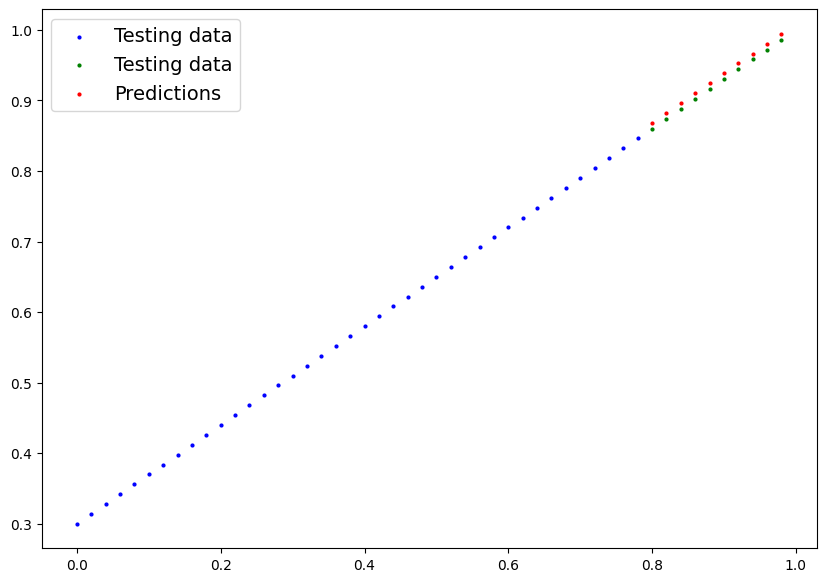

In [464]:
plot_predictions(predictions=y_preds_new)

In [465]:
def test_loop(epochs):
    for epoch in range(epochs):
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 ==0:
            print(f" Epoch: {epoch} | Test Loss: {test_loss}")
            test_loss_values.append(test_loss)

In [466]:
test_loop(epochs=200)

 Epoch: 0 | Test Loss: 0.008447891101241112
 Epoch: 10 | Test Loss: 0.008447891101241112
 Epoch: 20 | Test Loss: 0.008447891101241112
 Epoch: 30 | Test Loss: 0.008447891101241112
 Epoch: 40 | Test Loss: 0.008447891101241112
 Epoch: 50 | Test Loss: 0.008447891101241112
 Epoch: 60 | Test Loss: 0.008447891101241112
 Epoch: 70 | Test Loss: 0.008447891101241112
 Epoch: 80 | Test Loss: 0.008447891101241112
 Epoch: 90 | Test Loss: 0.008447891101241112
 Epoch: 100 | Test Loss: 0.008447891101241112
 Epoch: 110 | Test Loss: 0.008447891101241112
 Epoch: 120 | Test Loss: 0.008447891101241112
 Epoch: 130 | Test Loss: 0.008447891101241112
 Epoch: 140 | Test Loss: 0.008447891101241112
 Epoch: 150 | Test Loss: 0.008447891101241112
 Epoch: 160 | Test Loss: 0.008447891101241112
 Epoch: 170 | Test Loss: 0.008447891101241112
 Epoch: 180 | Test Loss: 0.008447891101241112
 Epoch: 190 | Test Loss: 0.008447891101241112


In [467]:
loss_values_np = np.array(torch.tensor(loss_values))
test_loss_values_np = np.array(torch.tensor(test_loss_values))

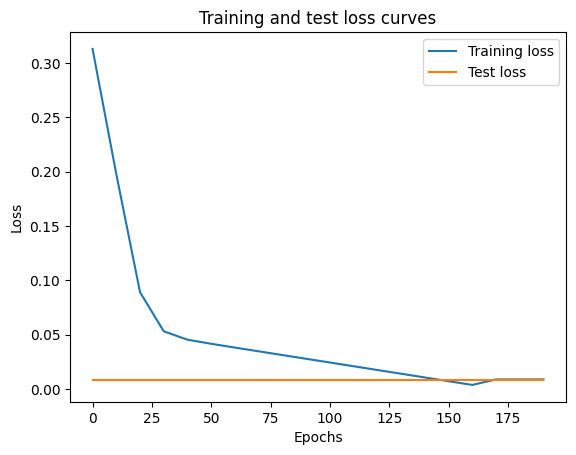

In [468]:
plt.plot(epoch_count, loss_values_np, label="Training loss")
plt.plot(epoch_count, test_loss_values_np, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();